## 팀과제 크롤링 시각화 파일

### 1. visit seoul 인기 관광지 크롤링
* 매장 분포도 바 그래프
* 매장 분포도 지도에 표시 (folium)

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,379 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import matplotlib.font_manager as fm
import matplotlib as mpl
from collections import Counter
import seaborn as sns

### 데이터 가져오기
### 명소

In [2]:
#크롤링 파일 2개 (장소/평점/장소코드/구군별)
vs_df1 = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/visitseoul.xlsx')
vs_df2 = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/pl_add.xlsx')


In [3]:
vs_df1.head()

index   평점    NO
0       양화진외국인선교사묘원  5.0  1153
1      호림박물관 (신사분관)  5.0  5548
2           갤러리 학고재  5.0  1872
3  송은아트큐브 (舊 송은갤러리)  5.0  3778
4           김종영 미술관  5.0  2066

In [4]:
vs_df2.head()

0
0  마포구
1  강남구
2  종로구
3  강남구
4  종로구

In [21]:
frame = [vs_df1,vs_df2]
vs_df3 = pd.concat(frame,axis=1 )
vs_df3.head()

index   평점    NO    0
0       양화진외국인선교사묘원  5.0  1153  마포구
1      호림박물관 (신사분관)  5.0  5548  강남구
2           갤러리 학고재  5.0  1872  종로구
3  송은아트큐브 (舊 송은갤러리)  5.0  3778  강남구
4           김종영 미술관  5.0  2066  종로구

In [22]:
vs_df3.columns = ['방문지', '평점','NO','gu']
vs_df3

방문지   평점     NO   gu
0         양화진외국인선교사묘원  5.0   1153  마포구
1        호림박물관 (신사분관)  5.0   5548  강남구
2             갤러리 학고재  5.0   1872  종로구
3    송은아트큐브 (舊 송은갤러리)  5.0   3778  강남구
4             김종영 미술관  5.0   2066  종로구
..                ...  ...    ...  ...
241             종로양복점  NaN  24708  NaN
242              국선옻칠  NaN  24705  NaN
243              구하산방  NaN  24703  NaN
244         동대문디자인플라자  NaN  24679  NaN
245               코엑스  NaN  24663  NaN

[246 rows x 4 columns]

In [23]:
vs_df3 = vs_df3[(vs_df3['평점'] >= 4.0)]
print(len(vs_df3))

108


In [24]:
vs_map = vs_df3.iloc[:108,:]
vs_map.head()

방문지   평점    NO   gu
0       양화진외국인선교사묘원  5.0  1153  마포구
1      호림박물관 (신사분관)  5.0  5548  강남구
2           갤러리 학고재  5.0  1872  종로구
3  송은아트큐브 (舊 송은갤러리)  5.0  3778  강남구
4           김종영 미술관  5.0  2066  종로구

## 엔터

In [ ]:
en_df1 = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/visitseoul_en.xlsx',names= ['방문지','평점','NO'])
en_df2 = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/en_add.xlsx',names= ['gu'])

In [ ]:
frame = [en_df1,en_df2]
en_df3 = pd.concat(frame,axis=1 )
en_df3.head()

방문지   평점     NO    gu
0  서울의 밤을 즐기자 : 홍대 일대, 경리단 길  5.0     56   마포구
1                 온고푸드커뮤니케이션  5.0  11843   종로구
2                영화 '괴물' 조형물  5.0  11905  영등포구
3                  시네코아셰프전용관  5.0  20766   종로구
4              아르코(ArKo)예술극장  5.0   1733   종로구

In [ ]:
en_map = en_df3.iloc[:58,:]
en_map

In [ ]:
en_gu = en_map['gu']

In [ ]:

gu_count = Counter(en_gu)
gu_count.most_common()

[('종로구', 14),
 ('중구', 13),
 ('마포구', 6),
 ('영등포구', 5),
 ('강남구', 4),
 ('서초구', 3),
 ('광진구', 2),
 ('용산구', 2),
 ('강서구', 1),
 ('송파구', 1),
 ('과천시', 1),
 ('구로구', 1),
 ('영등포구 ', 1),
 ('광진구 ', 1),
 ('서울 ', 1),
 ('노원구', 1),
 ('성동구', 1)]

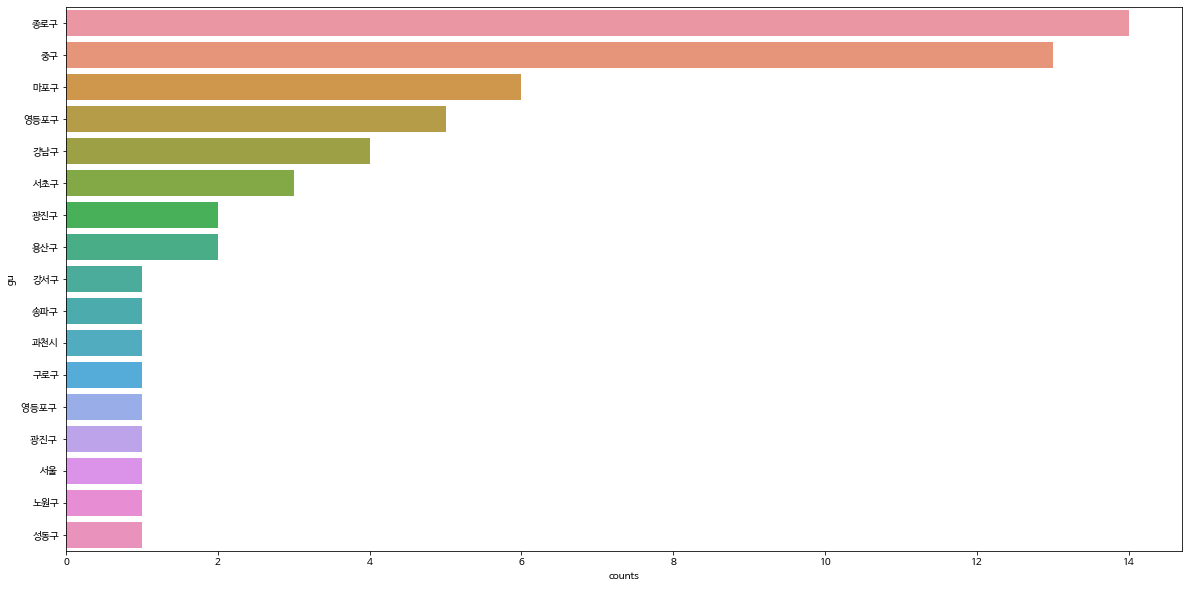

In [ ]:
gu_counts_df = pd.DataFrame(gu_count.most_common())
gu_counts_df.columns=['gu','counts']

plt.figure(figsize = (20,10))
sns.barplot(x='counts', y='gu', data=gu_counts_df) 
plt.show()
#pie.savefig("인기엔터 바그래프.png")

In [ ]:
gu_counts_df['counts'] = gu_counts_df['counts'].astype(int)

Text(0.5, 1.0, '인기 엔테터인먼트 지역')

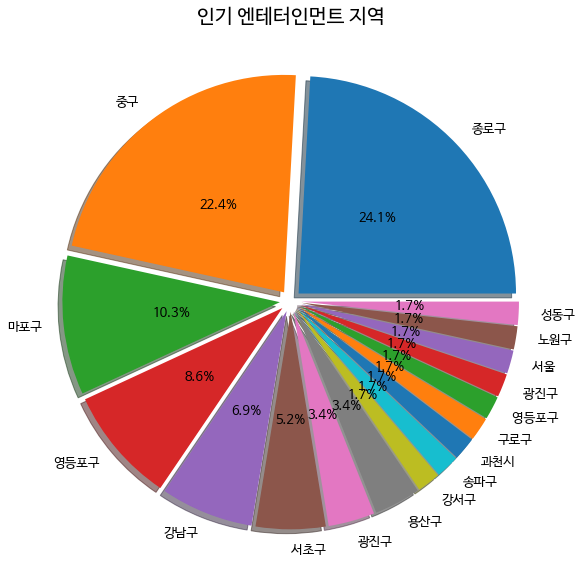

In [ ]:
pie, ax = plt.subplots(figsize=[15,10])
labels = gu_counts_df['gu']
plt.pie(x=gu_counts_df['counts'],shadow=True, autopct="%.1f%%",explode=[0.05]*17,labels=labels, pctdistance=0.5, textprops={'fontsize': 13} )
plt.title("인기 엔테터인먼트 지역", fontsize=20)
#pie.savefig("인기엔터 파이차트.png")

##쇼핑

In [ ]:
sh_df1 = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/visitseoul_sh.xlsx',names= ['방문지','평점','NO'])
sh_df2 = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/sh_add.xlsx',names= ['gugun','nan'])

In [ ]:
frame = [sh_df1,sh_df2]
sh_df3 = pd.concat(frame,axis=1 )
sh_df3.head()

방문지   평점     NO gugun  nan
0    반디네일 강남본점  5.0  11965   강남구  NaN
1          에비수  5.0   9779    중구  NaN
2         새김소리  5.0  11785   종로구  NaN
3  회현 중고 LP 상가  5.0   1939    중구  NaN
4        명동 쇼핑  4.5     67    중구

In [ ]:
sh_map = sh_df3.iloc[:47,:]
sh_map

방문지   평점     NO gugun  nan
0           반디네일 강남본점  5.0  11965   강남구  NaN
1                 에비수  5.0   9779    중구  NaN
2                새김소리  5.0  11785   종로구  NaN
3         회현 중고 LP 상가  5.0   1939    중구  NaN
4               명동 쇼핑  4.5     67    중구     
5             제2롯데월드몰  4.5  15859   송파구     
6            이마트 왕십리점  4.5   9889   성동구     
7            MCM 스페이스  4.5  11921    중구     
8       홍대앞 예술시장 프리마켓  4.5    491   마포구  NaN
9        교보 핫트랙스 광화문점  4.5    503   종로구     
10             서울약령시장  4.5   1356  동대문구  NaN
11        현대백화점 무역센터점  4.5   9606   강남구     
12          답십리 고미술상가  4.5   1379  동대문구  NaN
13         정샘물 인스피레이션  4.5  11883   강남구  NaN
14               인사동길  4.0     80   종로구     
15              남대문시장  4.0     85    중구     
16               광장시장  4.0    286   종로구  NaN
17    DDP(동대문디자인플라자)   4.0     95   동작구     
18           노량진 수산시장  4.0   9506   강남구     
19           신사동 가로수길  4.0    291   강남구     
20               코엑스몰  4.0    268    중구  NaN
21           롯데백화점 본점  4.0    217   용산구     
22             이태원 거리  4.0   2080    중구  NaN
23           동대문 쇼핑타운  4.0     61  서대문구  NaN
24           동대문 종합시장  4.0    170   강남구  NaN
25            이대 패션거리  4.0    425   영중로  NaN
26          햇츠온 가로수길점  4.0  12005   종로구  NaN
27              타임스퀘어  4.0    403   서초구     
28               통인시장  4.0    281    중구     
29            삼성 딜라이트  4.0    515   용산구     
30        롯데 영플라자 명동점  4.0  10521   마포구  NaN
31              아이파크몰  4.0   1702   강남구     
32             메세나폴리스  4.0  11106   금천구  NaN
33           현대백화점 본점  4.0   9627    중구     
34             마리오아울렛  4.0    490   종로구     
35         신세계백화점 강남점  4.0   9575   강남구     
36              광희패션몰  4.0  15403    중구  NaN
37     이태원 앤티크(가구) 거리  4.0   2051   종로구  NaN
38  동대문역 창신동 완구 도매 시장  4.0    190   강남구     
39       갤러리아백화점 WEST  4.0   2028   종로구  NaN
40        롯데백화점 에비뉴엘관  4.0   9521    중구  NaN
41            동묘 벼룩시장  4.0   9648   서초구  NaN
42          10 꼬르소 꼬모  4.0  11597   도봉구     
43          종로 귀금속 거리  4.0   2106    중구  NaN
44         동대문 헌책방 거리  4.0   1742   종로구  NaN
45              하이브랜드  4.0   2144    중구  NaN
46          방학동 도깨비시장  4.0   9631   NaN  NaN

In [ ]:
sh_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   방문지     47 non-null     object 
 1   평점      47 non-null     float64
 2   NO      47 non-null     int64  
 3   gugun   46 non-null     object 
 4   nan     21 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.0+ KB


In [ ]:
sh_gu = sh_map['gugun']

In [ ]:
gu_count = Counter(sh_gu)
gu_count.most_common(14)

[('중구', 13),
 ('강남구', 9),
 ('종로구', 9),
 ('마포구', 2),
 ('동대문구', 2),
 ('용산구', 2),
 ('서초구', 2),
 ('송파구', 1),
 ('성동구', 1),
 ('동작구', 1),
 ('서대문구', 1),
 ('영중로', 1),
 ('금천구', 1),
 ('도봉구', 1)]

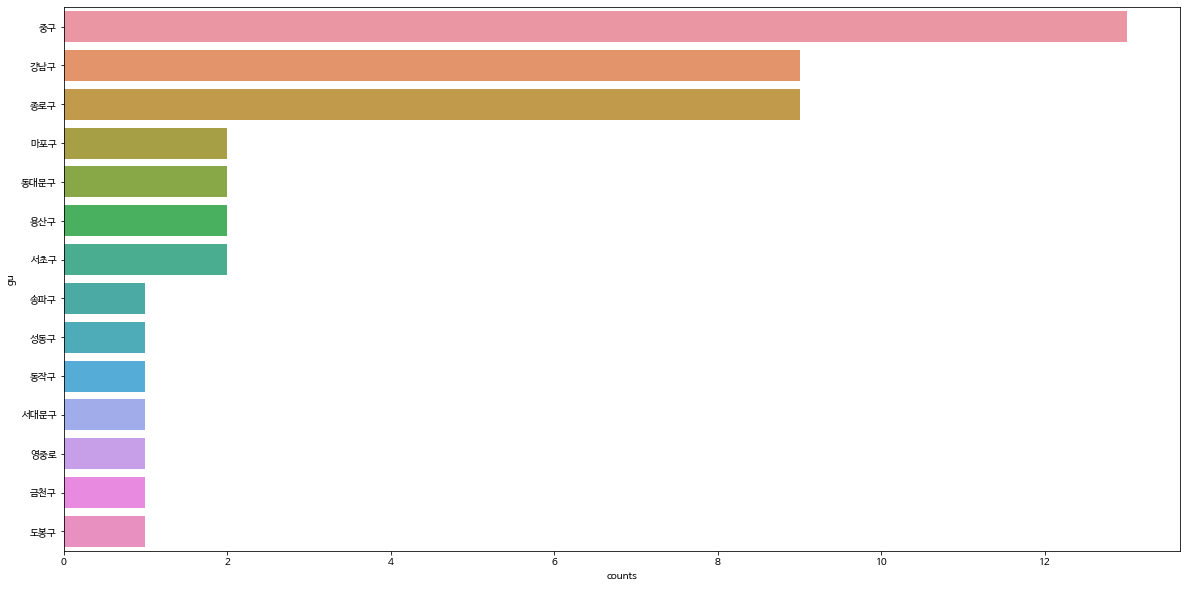

In [ ]:
gu_counts_df = pd.DataFrame(gu_count.most_common(14))
gu_counts_df.columns=['gu','counts']

plt.figure(figsize = (20,10))
sns.barplot(x='counts', y='gu', data=gu_counts_df) 
plt.show()
pie.savefig("인기쇼핑지 바그래프.png")

In [ ]:
gu_counts_df['counts'] = gu_counts_df['counts'].astype(int)

In [ ]:
gu_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gu      14 non-null     object
 1   counts  14 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 352.0+ bytes


Text(0.5, 1.0, '서울 내 인기 쇼핑지 분포 (구군별)')

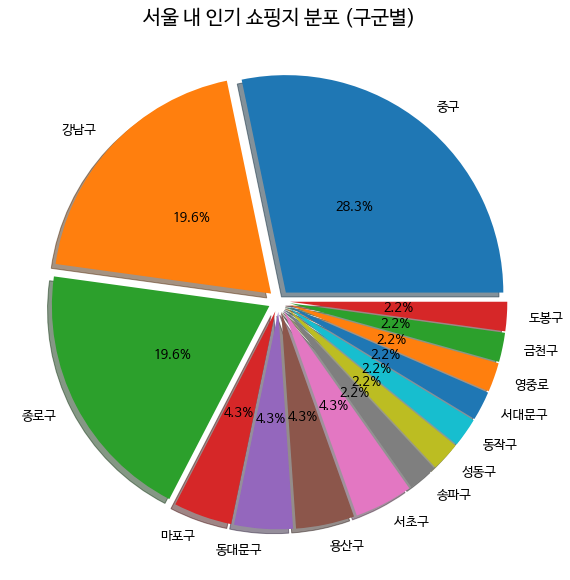

In [ ]:
pie, ax = plt.subplots(figsize=[15,10])
labels = gu_counts_df['gu']
plt.pie(x=gu_counts_df['counts'],shadow=True, autopct="%.1f%%",explode=[0.05]*14,labels=labels, pctdistance=0.5, textprops={'fontsize': 13} )
plt.title("서울 내 인기 쇼핑지 분포 (구군별)", fontsize=20)
#pie.savefig("인기쇼핑지 파이차트.png")

## 자연

In [ ]:
na_df1 = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/visitseoul_na.xlsx',names= ['방문지','평점','NO'])
na_df2 = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/dt2/8주차 팀과제/data/na_add.xlsx',names= ['gu'])

In [ ]:
frame = [na_df1,na_df2]
na_df3 = pd.concat(frame,axis=1 )
na_df3.head(50)

In [ ]:
na_map = na_df3.iloc[:39,:]
na_map

In [ ]:
na_gu = na_map['gu']


In [ ]:
gu_count = Counter(na_gu)
gu_count.most_common()

[('종로구', 6),
 ('영등포구', 6),
 ('송파구', 3),
 ('마포구', 3),
 ('관악구', 2),
 ('송파구 ', 2),
 ('종로구 ', 2),
 ('도봉구', 1),
 ('중구', 1),
 ('성북구', 1),
 ('광진구', 1),
 ('성동구', 1),
 ('과천시', 1),
 ('강북구', 1),
 ('동작구', 1),
 ('서초구', 1),
 ('동대문구', 1),
 ('마포구 ', 1),
 ('노원구 ', 1),
 ('강동구 ', 1),
 ('양천구 ', 1),
 ('강남구 ', 1)]

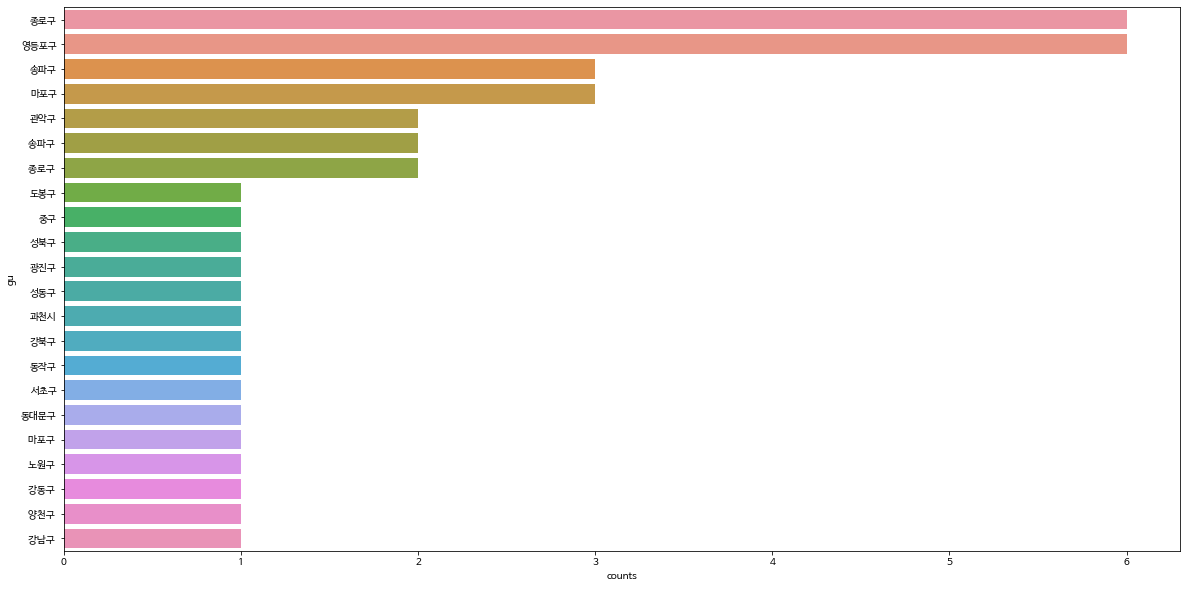

In [ ]:
gu_counts_df = pd.DataFrame(gu_count.most_common())
gu_counts_df.columns=['gu','counts']

plt.figure(figsize = (20,10))
sns.barplot(x='counts', y='gu', data=gu_counts_df) 
plt.show()
#pie.savefig("인기엔터 바그래프.png")

Text(0.5, 1.0, '인기 자연여행지')

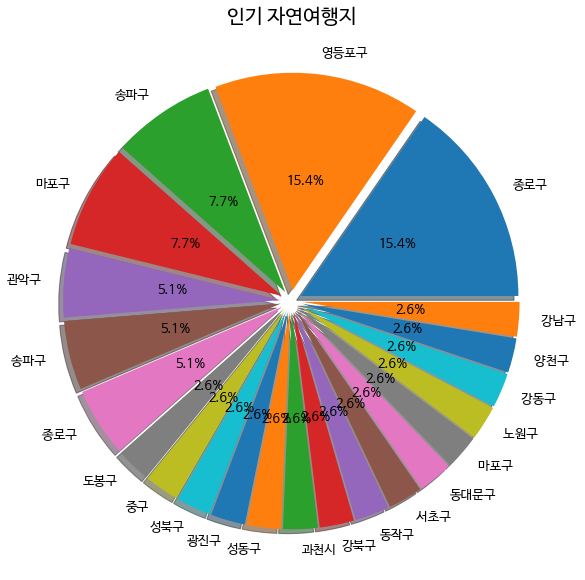

In [ ]:
pie, ax = plt.subplots(figsize=[15,10])
labels = gu_counts_df['gu']
plt.pie(x=gu_counts_df['counts'],shadow=True, autopct="%.1f%%",explode=[0.05]*22,labels=labels, pctdistance=0.5, textprops={'fontsize': 13} )
plt.title("인기 자연여행지", fontsize=20)
#pie.savefig("인기엔터 파이차트.png")

## 바차트

In [25]:
vs_gu = vs_map['gu']

In [26]:
gu_count = Counter(vs_gu)
gu_count.most_common()

[(nan, 37),
 ('종로구', 28),
 ('중구', 8),
 ('용산구', 6),
 ('서초구', 5),
 ('강남구', 4),
 ('성북구', 4),
 ('동대문구', 3),
 ('송파구', 3),
 ('서대문구', 3),
 ('마포구', 1),
 ('동작구', 1),
 ('성동구', 1),
 ('은평구', 1),
 ('강북구', 1),
 ('강서구', 1),
 ('영등포구', 1)]

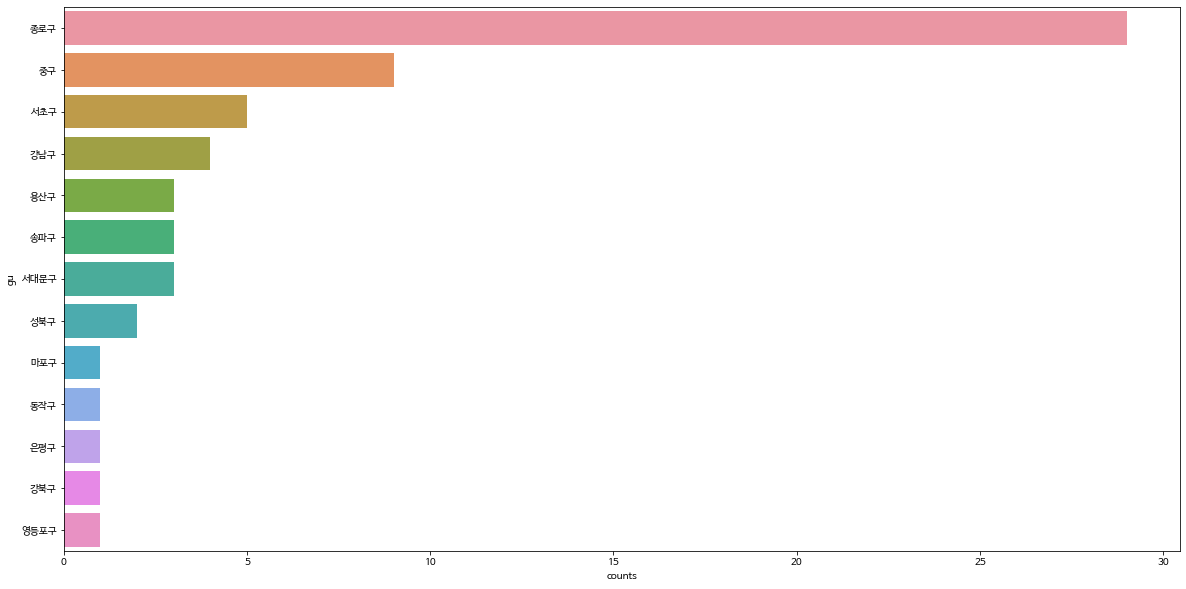

In [ ]:
gu_counts_df = pd.DataFrame(gu_count.most_common())
gu_counts_df.columns=['gu','counts']

plt.figure(figsize = (20,10))
sns.barplot(x='counts', y='gu', data=gu_counts_df) 
plt.show()

In [ ]:
gu_counts_df['counts'] = gu_counts_df['counts'].astype(int)

In [ ]:
gu_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gu      13 non-null     object
 1   counts  13 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 336.0+ bytes


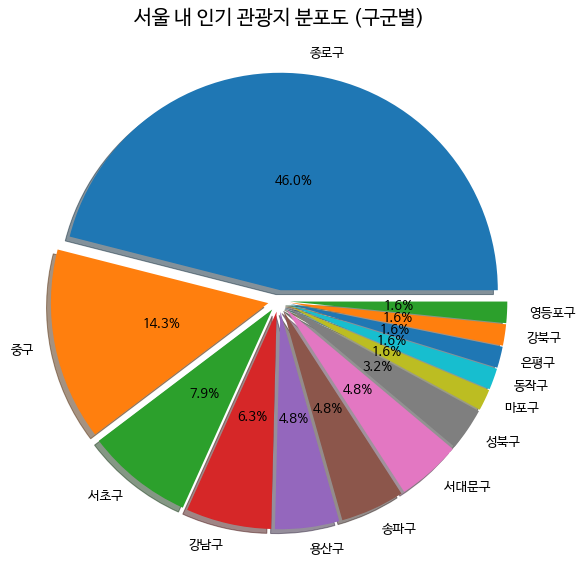

In [ ]:
pie, ax = plt.subplots(figsize=[15,10])
labels = gu_counts_df['gu']
plt.pie(x=gu_counts_df['counts'],shadow=True, autopct="%.1f%%",explode=[0.05]*13,labels=labels, pctdistance=0.5, textprops={'fontsize': 13} )
plt.title("서울 내 인기 관광지 분포도 (구군별)", fontsize=20)
pie.savefig("인기관광지PieChart.png")

## 지도에 표시하기

In [ ]:
import folium
import urllib.request, json
import requests

url = "https://raw.githubusercontent.com/suanlab/dataset/master"
seoul_geo = f'{url}/seoul_municipalities_geo_simple.json'


In [ ]:
vs_m = folium.Map(
    location=[37.528043, 126.980238],
    zoom_start=5, 
    
)
folium.Marker(location=[37.528043, 126.980238],
              icon=folium.Icon(color='green', icon='star')).add_to(vs_m)



folium.GeoJson(json.loads(requests.get(seoul_geo).text),
               name='seoul_municipalities'
               ).add_to(vs_m)
#vs_m

In [ ]:
from branca.colormap import linear
colormap = linear.Blues_09.scale(
    gu_counts_df.counts.min(),
    gu_counts_df.counts.max(),
)

colormap

In [ ]:
gu_dict = gu_counts_df.set_index('gu')['counts']
gu_dict['강동구'] = 0
# gu_dict['관악구'] = 0
gu_dict['금천구'] = 0
gu_dict['구로구'] = 0
gu_dict['강서구'] = 0
gu_dict['양천구'] = 0
gu_dict['노원구'] = 0
# gu_dict['도봉구'] = 0
# gu_dict['중랑구'] = 0
# gu_dict['동대문구'] = 0
# # gu_dict['광진구'] = 0
# gu_dict['성동구'] = 0
# # gu_dict['영등포구'] = 0
gu_dict['은평구'] = 0
# gu_dict['강북구'] = 0
# gu_dict['성북구'] = 0
# gu_dict['동작구'] = 0
gu_dict['서대문구'] = 0 
gu_dict['강남구'] = 0
gu_dict['중랑구'] = 0 
gu_dict['용산구'] = 0 
print(gu_dict)


gu
종로구     6
영등포구    6
송파구     3
마포구     3
관악구     2
송파구     2
종로구     2
도봉구     1
중구      1
성북구     1
광진구     1
성동구     1
과천시     1
강북구     1
동작구     1
서초구     1
동대문구    1
마포구     1
노원구     1
강동구     1
양천구     1
강남구     1
강동구     0
금천구     0
구로구     0
강서구     0
양천구     0
노원구     0
은평구     0
서대문구    0
강남구     0
중랑구     0
용산구     0
Name: counts, dtype: int64


In [ ]:
color_dict = {str(key): colormap(gu_dict[key]) for key in gu_dict.keys() }
color_dict 
#gu 색깔 지정

{'강남구': '#f7fbffff',
 '강남구 ': '#f7fbffff',
 '강동구': '#f7fbffff',
 '강동구 ': '#f7fbffff',
 '강북구': '#f7fbffff',
 '강서구': '#f7fbffff',
 '과천시': '#f7fbffff',
 '관악구': '#d0e2f3ff',
 '광진구': '#f7fbffff',
 '구로구': '#f7fbffff',
 '금천구': '#f7fbffff',
 '노원구': '#f7fbffff',
 '노원구 ': '#f7fbffff',
 '도봉구': '#f7fbffff',
 '동대문구': '#f7fbffff',
 '동작구': '#f7fbffff',
 '마포구': '#94c5dfff',
 '마포구 ': '#f7fbffff',
 '서대문구': '#f7fbffff',
 '서초구': '#f7fbffff',
 '성동구': '#f7fbffff',
 '성북구': '#f7fbffff',
 '송파구': '#94c5dfff',
 '송파구 ': '#d0e2f3ff',
 '양천구': '#f7fbffff',
 '양천구 ': '#f7fbffff',
 '영등포구': '#08306bff',
 '용산구': '#f7fbffff',
 '은평구': '#f7fbffff',
 '종로구': '#08306bff',
 '종로구 ': '#d0e2f3ff',
 '중구': '#f7fbffff',
 '중랑구': '#f7fbffff'}

In [ ]:
vs_m = folium.Map(location=[37.528043, 126.980238],
    zoom_start=11,tiles='Stamen Toner'
    
)


folium.GeoJson(seoul_geo,
               name='counts',
               style_function = lambda feature:{
                   'fillColor':color_dict[feature['properties']['name']],
                   'color':'black',
                   'weight':1,
                   'dashArray':'5, 5',
                   'fillOpacity': 0.8
               }
               ).add_to(vs_m)

colormap.caption = 'color scale'
colormap.add_to(vs_m)
folium.LayerControl().add_to(vs_m)

vs_m